In [153]:
import pandas as pd
from sklearn.decomposition import NMF
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
# PyTorch related imports would go here
import numpy as np

In [154]:
from sklearn.feature_extraction.text import TfidfVectorizer
from us import states
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import re

In [155]:
state_names = [state.name.lower() for state in states.STATES]
state_abbrs = [state.abbr for state in states.STATES]
city_df = pd.read_csv('PM25-Speciated/worldcities.csv')
city_names = city_df['city_ascii'].str.lower().tolist()  # First column
country_names = city_df['country'].str.lower().tolist()  # First column

In [156]:
stop_words = TfidfVectorizer(stop_words='english').get_stop_words()
stop_words = list(list(stop_words)+ city_names + country_names + state_names + state_abbrs)

# Original Data

In [157]:
df = pd.read_csv('PM25-Speciated/Speciate_Raw_V07052024.csv')

In [158]:
df

,code,name,mass,cat1,cat2,cat3,species,weight%
0,10,Overall Composite,55.476002,Miscellaneous,Miscellaneous,Miscellaneous,Ammonium,0.023000
1,10,Overall Composite,55.476002,Miscellaneous,Miscellaneous,Miscellaneous,Potassium,1.843000
2,10,Overall Composite,55.476002,Miscellaneous,Miscellaneous,Miscellaneous,Selenium,0.025000
3,10,Overall Composite,55.476002,Miscellaneous,Miscellaneous,Miscellaneous,Silicon,7.736000
4,10,Overall Composite,55.476002,Miscellaneous,Miscellaneous,Miscellaneous,Sodium,1.377000
...,...,...,...,...,...,...,...,...
80895,SUGP02,Sugar Cane Pre-Harvest Burning Mexico,100.000000,Combustion,Biomass Burning; Agriculture,Pre-harvest Sugar Cane,Potassium,17.899160
80896,SUGP02,Sugar Cane Pre-Harvest Burning Mexico,100.000000,Combustion,Biomass Burning; Agriculture,Pre-harvest Sugar Cane,Sodium,0.168067
80897,SUGP02,Sugar Cane Pre-Harvest Burning Mexico,100.000000,Combustion,Biomass Burning; Agriculture,Pre-harvest Sugar Cane,Sulfate,3.361345
80898,SUGP02,Sugar Cane Pre-Harvest Burning Mexico,100.000000,Combustion,Biomass Burning; Agriculture,Pre-harvest Sugar Cane,Ammonium,2.184874


In [159]:
df = df.pivot_table(index=['code', 'name'], columns='species', values='weight%', aggfunc='first').reset_index()
# Fill NaN values with 0 (or any other value you prefer)
df = df.fillna(0)

In [160]:
df

species,code,name,Aluminum,Ammonium,Antimony,Arsenic,Bromine,Cadmium,Calcium,Calcium ion,...,Silica,Silicon,Sodium,Sodium ion,Sulfate,Sulfur,Tin,Vanadium,Zinc,Zirconium
0,00000C,Overall Composite,4.079000,0.030000,0.806000,1.118000,0.0,0.285000,2.804000,0.0,...,0.0,8.933000,1.577000,0.00000,5.030000,2.457000,0.103000,0.059000,2.235000,0.004000
1,10,Overall Composite,3.819000,0.023000,0.809000,1.410000,0.0,0.385000,2.399000,0.0,...,0.0,7.736000,1.377000,0.00000,5.046000,2.632000,0.114000,0.058000,2.218000,0.002000
2,100CROC,Onroad Gasoline Cold Start,0.000000,0.430694,0.000000,0.000000,0.0,0.000000,0.387691,0.0,...,0.0,0.000000,0.005178,0.00000,0.945113,0.000000,0.000000,0.000000,0.078439,0.000000
3,101CROC,Onroad Gasoline Running,0.323953,2.778929,0.000000,0.000000,0.0,0.000000,1.443041,0.0,...,0.0,0.323953,0.039129,0.00000,7.187084,0.000000,0.000000,0.000000,0.592782,0.000000
4,102CROC,Onroad Diesel Non-DPF Idle,0.060154,1.739422,0.000000,0.000000,0.0,0.000000,0.584029,0.0,...,0.0,0.297084,0.307717,0.00000,5.266531,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3800,95806,Peat Fire-Smoldering-Minnesota AE6,0.000376,0.107249,0.000000,0.000905,0.0,0.000000,0.000000,0.0,...,0.0,0.001436,0.000000,0.00000,0.428752,0.283134,0.000000,0.000266,0.000000,0.000063
3801,95807,Forest Fire Understory-Flaming-Minnesota AE6,0.000000,0.059422,0.034348,0.001050,0.0,0.031667,0.000000,0.0,...,0.0,0.006495,0.000000,0.00000,0.318718,0.211847,0.000000,0.005668,0.035434,0.000000
3802,95808,Forest Fire Understory-Smoldering-Minnesota AE6,0.000000,0.057489,0.004902,0.000693,0.0,0.003139,0.032457,0.0,...,0.0,0.004388,0.051420,0.07137,0.512190,0.281013,0.001126,0.000298,0.005076,0.000067
3803,95809,Grass Fire-Field-Kansas AE6,0.039424,0.159261,0.002697,0.001284,0.0,0.001939,0.790562,0.0,...,0.0,0.881017,0.031122,0.00000,0.828073,0.382831,0.004751,0.000134,0.040129,0.000624


In [161]:
def clean_text(text):
    # Remove numbers and special characters
    text = re.sub(r'[^A-Za-z\s]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

In [162]:
# df['name'] = df['name'].apply(clean_text)

In [163]:
df

species,code,name,Aluminum,Ammonium,Antimony,Arsenic,Bromine,Cadmium,Calcium,Calcium ion,...,Silica,Silicon,Sodium,Sodium ion,Sulfate,Sulfur,Tin,Vanadium,Zinc,Zirconium
0,00000C,Overall Composite,4.079000,0.030000,0.806000,1.118000,0.0,0.285000,2.804000,0.0,...,0.0,8.933000,1.577000,0.00000,5.030000,2.457000,0.103000,0.059000,2.235000,0.004000
1,10,Overall Composite,3.819000,0.023000,0.809000,1.410000,0.0,0.385000,2.399000,0.0,...,0.0,7.736000,1.377000,0.00000,5.046000,2.632000,0.114000,0.058000,2.218000,0.002000
2,100CROC,Onroad Gasoline Cold Start,0.000000,0.430694,0.000000,0.000000,0.0,0.000000,0.387691,0.0,...,0.0,0.000000,0.005178,0.00000,0.945113,0.000000,0.000000,0.000000,0.078439,0.000000
3,101CROC,Onroad Gasoline Running,0.323953,2.778929,0.000000,0.000000,0.0,0.000000,1.443041,0.0,...,0.0,0.323953,0.039129,0.00000,7.187084,0.000000,0.000000,0.000000,0.592782,0.000000
4,102CROC,Onroad Diesel Non-DPF Idle,0.060154,1.739422,0.000000,0.000000,0.0,0.000000,0.584029,0.0,...,0.0,0.297084,0.307717,0.00000,5.266531,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3800,95806,Peat Fire-Smoldering-Minnesota AE6,0.000376,0.107249,0.000000,0.000905,0.0,0.000000,0.000000,0.0,...,0.0,0.001436,0.000000,0.00000,0.428752,0.283134,0.000000,0.000266,0.000000,0.000063
3801,95807,Forest Fire Understory-Flaming-Minnesota AE6,0.000000,0.059422,0.034348,0.001050,0.0,0.031667,0.000000,0.0,...,0.0,0.006495,0.000000,0.00000,0.318718,0.211847,0.000000,0.005668,0.035434,0.000000
3802,95808,Forest Fire Understory-Smoldering-Minnesota AE6,0.000000,0.057489,0.004902,0.000693,0.0,0.003139,0.032457,0.0,...,0.0,0.004388,0.051420,0.07137,0.512190,0.281013,0.001126,0.000298,0.005076,0.000067
3803,95809,Grass Fire-Field-Kansas AE6,0.039424,0.159261,0.002697,0.001284,0.0,0.001939,0.790562,0.0,...,0.0,0.881017,0.031122,0.00000,0.828073,0.382831,0.004751,0.000134,0.040129,0.000624


In [164]:
# numeric_cols = df.select_dtypes(include=[np.number]).columns
# text_cols = df.select_dtypes(include=[object]).columns

# print(text_cols)

# agg_funcs = {col: 'mean' for col in numeric_cols}
# agg_funcs.update({col: lambda x: np.random.choice(x) for col in text_cols if col != 'name'})

# pivot_df = df.groupby('name').agg(agg_funcs).reset_index()

In [165]:
# cols = list(pivot_df.columns)
# cols.insert(0, cols.pop(cols.index('code')))
# pivot_df = pivot_df[cols]
# pivot_df

In [166]:
pivot_df = df
pivot_df

species,code,name,Aluminum,Ammonium,Antimony,Arsenic,Bromine,Cadmium,Calcium,Calcium ion,...,Silica,Silicon,Sodium,Sodium ion,Sulfate,Sulfur,Tin,Vanadium,Zinc,Zirconium
0,00000C,Overall Composite,4.079000,0.030000,0.806000,1.118000,0.0,0.285000,2.804000,0.0,...,0.0,8.933000,1.577000,0.00000,5.030000,2.457000,0.103000,0.059000,2.235000,0.004000
1,10,Overall Composite,3.819000,0.023000,0.809000,1.410000,0.0,0.385000,2.399000,0.0,...,0.0,7.736000,1.377000,0.00000,5.046000,2.632000,0.114000,0.058000,2.218000,0.002000
2,100CROC,Onroad Gasoline Cold Start,0.000000,0.430694,0.000000,0.000000,0.0,0.000000,0.387691,0.0,...,0.0,0.000000,0.005178,0.00000,0.945113,0.000000,0.000000,0.000000,0.078439,0.000000
3,101CROC,Onroad Gasoline Running,0.323953,2.778929,0.000000,0.000000,0.0,0.000000,1.443041,0.0,...,0.0,0.323953,0.039129,0.00000,7.187084,0.000000,0.000000,0.000000,0.592782,0.000000
4,102CROC,Onroad Diesel Non-DPF Idle,0.060154,1.739422,0.000000,0.000000,0.0,0.000000,0.584029,0.0,...,0.0,0.297084,0.307717,0.00000,5.266531,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3800,95806,Peat Fire-Smoldering-Minnesota AE6,0.000376,0.107249,0.000000,0.000905,0.0,0.000000,0.000000,0.0,...,0.0,0.001436,0.000000,0.00000,0.428752,0.283134,0.000000,0.000266,0.000000,0.000063
3801,95807,Forest Fire Understory-Flaming-Minnesota AE6,0.000000,0.059422,0.034348,0.001050,0.0,0.031667,0.000000,0.0,...,0.0,0.006495,0.000000,0.00000,0.318718,0.211847,0.000000,0.005668,0.035434,0.000000
3802,95808,Forest Fire Understory-Smoldering-Minnesota AE6,0.000000,0.057489,0.004902,0.000693,0.0,0.003139,0.032457,0.0,...,0.0,0.004388,0.051420,0.07137,0.512190,0.281013,0.001126,0.000298,0.005076,0.000067
3803,95809,Grass Fire-Field-Kansas AE6,0.039424,0.159261,0.002697,0.001284,0.0,0.001939,0.790562,0.0,...,0.0,0.881017,0.031122,0.00000,0.828073,0.382831,0.004751,0.000134,0.040129,0.000624


In [167]:
pivot_df.iloc[:,2:47].head()

species,Aluminum,Ammonium,Antimony,Arsenic,Bromine,Cadmium,Calcium,Calcium ion,Chloride ion,Chlorine,...,Silica,Silicon,Sodium,Sodium ion,Sulfate,Sulfur,Tin,Vanadium,Zinc,Zirconium
0,4.079000,0.030000,0.806,1.118,0.0,0.285,2.804000,0.0,0.0,0.0,...,0.0,8.933000,1.577000,0.0,5.030000,2.457,0.103,0.059,2.235000,0.004
1,3.819000,0.023000,0.809,1.410,0.0,0.385,2.399000,0.0,0.0,0.0,...,0.0,7.736000,1.377000,0.0,5.046000,2.632,0.114,0.058,2.218000,0.002
2,0.000000,0.430694,0.000,0.000,0.0,0.000,0.387691,0.0,0.0,0.0,...,0.0,0.000000,0.005178,0.0,0.945113,0.000,0.000,0.000,0.078439,0.000
3,0.323953,2.778929,0.000,0.000,0.0,0.000,1.443041,0.0,0.0,0.0,...,0.0,0.323953,0.039129,0.0,7.187084,0.000,0.000,0.000,0.592782,0.000
4,0.060154,1.739422,0.000,0.000,0.0,0.000,0.584029,0.0,0.0,0.0,...,0.0,0.297084,0.307717,0.0,5.266531,0.000,0.000,0.000,0.000000,0.000


# Clustering based on numeric values

In [168]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from collections import Counter

In [169]:
def assign_cluster_name(cluster):
    names = pivot_df[pivot_df['speciated_cluster'] == cluster]['name']
    most_common_name = Counter(names).most_common(1)[0][0]
    return most_common_name

In [170]:
X = pivot_df.iloc[:, 2:47]
#scaler = StandardScaler()
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [171]:
model = NMF(n_components=32, init='random', random_state=0, max_iter=1000)
W = model.fit_transform(X)
H = model.components_

# What features to use for clustering

In [172]:
# Assuming 'target' is the category column, and 'name' is the label
X = pivot_df.iloc[:, 2:47]
#X = W

In [173]:
n_clusters = 32
kmeans = KMeans(n_clusters=n_clusters, random_state=42,n_init='auto')
pivot_df['speciated_cluster'] = kmeans.fit_predict(X)

# Create a new column for cluster names
pivot_df['speciated_cluster_name'] = pivot_df['speciated_cluster'].apply(assign_cluster_name)

pivot_df.head()

species,code,name,Aluminum,Ammonium,Antimony,Arsenic,Bromine,Cadmium,Calcium,Calcium ion,...,Sodium,Sodium ion,Sulfate,Sulfur,Tin,Vanadium,Zinc,Zirconium,speciated_cluster,speciated_cluster_name
0,00000C,Overall Composite,4.079000,0.030000,0.806,1.118,0.0,0.285,2.804000,0.0,...,1.577000,0.0,5.030000,2.457,0.103,0.059,2.235000,0.004,20,Paved Road Dust
1,10,Overall Composite,3.819000,0.023000,0.809,1.410,0.0,0.385,2.399000,0.0,...,1.377000,0.0,5.046000,2.632,0.114,0.058,2.218000,0.002,20,Paved Road Dust
2,100CROC,Onroad Gasoline Cold Start,0.000000,0.430694,0.000,0.000,0.0,0.000,0.387691,0.0,...,0.005178,0.0,0.945113,0.000,0.000,0.000,0.078439,0.000,3,Hazardous Waste Incineration - Liquid Fuel Boiler
3,101CROC,Onroad Gasoline Running,0.323953,2.778929,0.000,0.000,0.0,0.000,1.443041,0.0,...,0.039129,0.0,7.187084,0.000,0.000,0.000,0.592782,0.000,3,Hazardous Waste Incineration - Liquid Fuel Boiler
4,102CROC,Onroad Diesel Non-DPF Idle,0.060154,1.739422,0.000,0.000,0.0,0.000,0.584029,0.0,...,0.307717,0.0,5.266531,0.000,0.000,0.000,0.000000,0.000,3,Hazardous Waste Incineration - Liquid Fuel Boiler


In [174]:
for cluster_num in range(n_clusters):
    print(f"\nCluster {cluster_num}:")
    cluster_texts = pivot_df[pivot_df['speciated_cluster'] == cluster_num]['name']
    for text in cluster_texts:
        print(f" - {text}")


Cluster 0:
 - Coal-Fired Power Plant
 - Coal-Fired Power Plant
 - Coal-Fired Power Plant
 - Coal-Fired Power Plant
 - Coal-Fired Power Plant
 - Coal-Fired Power Plant
 - Coal-Fired Power Plant
 - Coal-Fired Power Plant
 - Coal-Fired Power Plant
 - Coal-Fired Power Plant
 - Coal-Fired Power Plant
 - Coal-Fired Power Plant/esp Composite
 - Coal-Fired Power Plant/esp Composite
 - Coal-Fired Power Plant/esp Composite
 - Coal- And Refuse Derived Fuel (RDF)-Fired Power Plant
 - Coal- And Refuse Derived Fuel (RDF)-Fired Power Plant
 - Coal- And Refuse Derived Fuel (RDF)-Fired Power Plant
 - Coal- And Refuse Derived Fuel (RDF)-Fired Power Plant
 - Oil-Fired Power Plant
 - Coal Dust
 - Composite Of Copper Ore Concentrate And Mining Waste
 - Composite Of Copper Ore Concentrate And Mining Waste
 - Composite Of Copper Ore Concentrate And Mining Waste
 - Composite Of Copper Ore Concentrate And Mining Waste
 - Primary Lead Smelting - Slag Dust
 - Charcoal Manufacturing
 - Charcoal Manufacturing
 - 

# Hierarchical Clustering

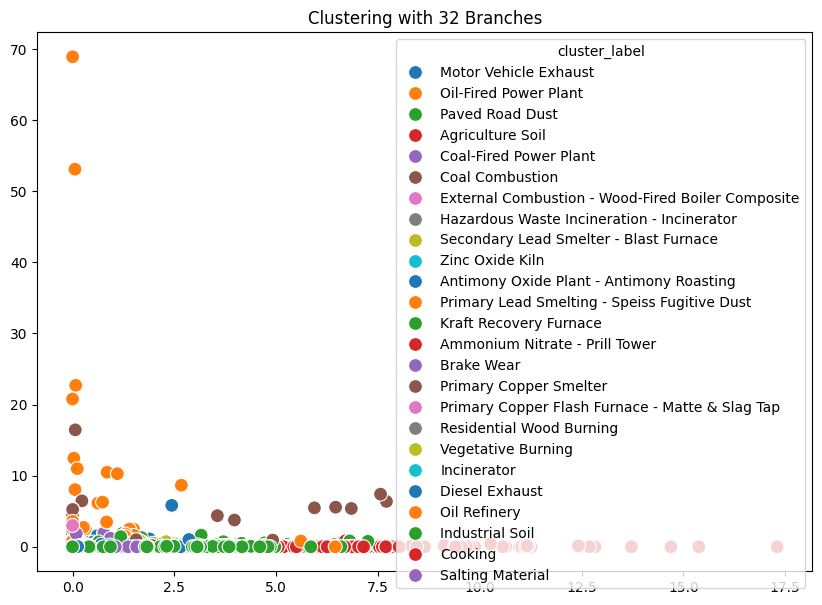

In [216]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from collections import Counter


# Assuming 'target' is the category column, and 'name' is the label
# X = pivot_df.iloc[:, 2:47]

# Perform Agglomerative Clustering with more branches (e.g., 5 clusters)
max_clusters = 32
#clustering = AgglomerativeClustering(n_clusters=max_clusters, linkage='ward')
clustering = AgglomerativeClustering(n_clusters=max_clusters, linkage='ward', metric='euclidean')
pivot_df['cluster'] = clustering.fit_predict(X)

# Assign majority name within each cluster
def get_majority_label(cluster, names):
    return Counter(names).most_common(1)[0][0]

cluster_majority_labels = {
    cluster: get_majority_label(cluster, pivot_df[pivot_df['cluster'] == cluster]['name'])
    for cluster in range(max_clusters)
}

# Replace cluster numbers with majority names
pivot_df['cluster_label'] = pivot_df['cluster'].map(cluster_majority_labels)

# Plot the clusters (using seaborn scatter plot for visualization)
plt.figure(figsize=(10, 7))

# Initialize NMF and fit to the data
# model = NMF(n_components=2, init='random', random_state=0)
# W = model.fit_transform(X)
# H = model.components_


sns.scatterplot(data=pivot_df, x=W[:, 0], y=W[:, 1], hue='cluster_label', palette='tab10', s=100)
plt.title(f'Clustering with {max_clusters} Branches')
plt.show()


## Dendogram Hierarchy

Cluster 0: Representative Name = Oil-Fired Power Plant, Number of Items = 186
Cluster 1: Representative Name = Coal Combustion, Number of Items = 219
Cluster 2: Representative Name = Motor Vehicle Exhaust, Number of Items = 143
Cluster 3: Representative Name = Hazardous Waste Incineration - Incinerator, Number of Items = 108
Cluster 4: Representative Name = Coal-Fired Power Plant, Number of Items = 58
Cluster 5: Representative Name = Paved Road Dust, Number of Items = 677
Cluster 6: Representative Name = Paved Road Dust, Number of Items = 188
Cluster 7: Representative Name = Primary Lead Smelting - Speiss Fugitive Dust, Number of Items = 30
Cluster 8: Representative Name = Motor Vehicle Exhaust, Number of Items = 1449
Cluster 9: Representative Name = Diesel Exhaust, Number of Items = 39
Cluster 10: Representative Name = Diesel Exhaust, Number of Items = 85
Cluster 11: Representative Name = Secondary Lead Smelter - Blast Furnace, Number of Items = 43
Cluster 12: Representative Name = Pr

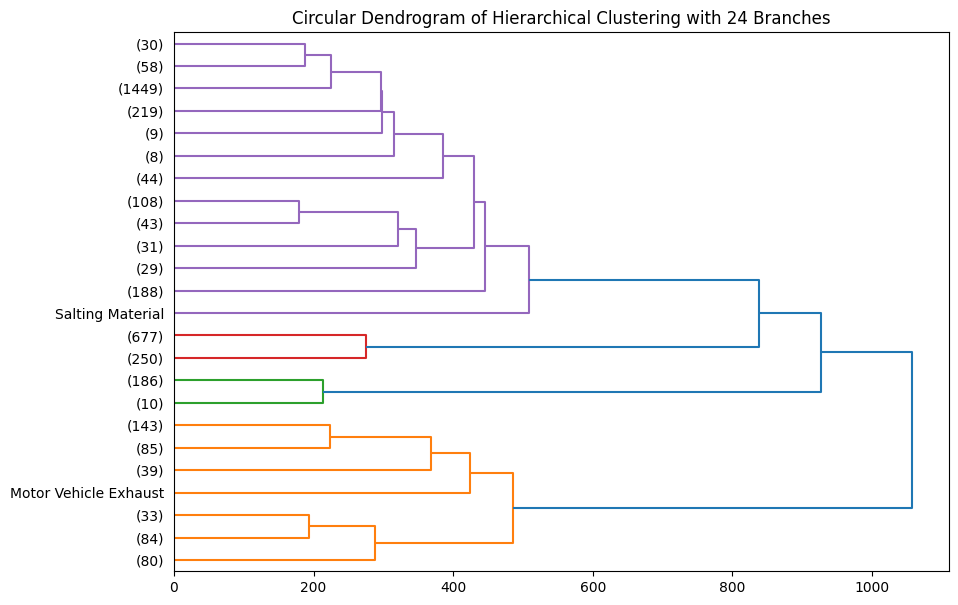

In [212]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from collections import Counter
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming 'target' is the category column, and 'name' is the label
# X = pivot_df.iloc[:, 2:47]

# Perform Agglomerative Clustering with more branches (e.g., 5 clusters)
max_clusters = 24
clustering = AgglomerativeClustering(n_clusters=max_clusters, linkage='ward')
pivot_df['cluster'] = clustering.fit_predict(X)

# Assign majority name within each cluster
def get_majority_label(cluster, names):
    return Counter(names).most_common(1)[0][0]

cluster_majority_labels = {}
for cluster in range(max_clusters):
    cluster_names = pivot_df[pivot_df['cluster'] == cluster]['name']
    majority_label = get_majority_label(cluster, cluster_names)
    cluster_majority_labels[cluster] = majority_label
    # Print cluster representative name and count of items in cluster
    print(f"Cluster {cluster}: Representative Name = {majority_label}, Number of Items = {len(cluster_names)}")

# Replace cluster numbers with majority names
pivot_df['cluster_label'] = pivot_df['cluster'].map(cluster_majority_labels)

# Generate the linkage matrix
Z = linkage(X, method='ward')

# Plot the circular dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='lastp', p=max_clusters, labels=pivot_df['cluster_label'].values, leaf_font_size=10, orientation='right')
plt.title(f'Circular Dendrogram of Hierarchical Clustering with {max_clusters} Branches')
plt.show()


### Dendogram of all points

In [218]:
plt.figure(figsize=(10, 500))
dendrogram(Z, labels=pivot_df['name'].values, leaf_font_size=5, orientation='right')
plt.title(f'Circular Dendrogram of Hierarchical Clustering with {max_clusters} Branches')
plt.show()


## Print Top k representatives within each clusters

Cluster 0: Representative Names = Oil-Fired Power Plant (24), Coal Combustion (15), Cement Kiln (12), Number of Items = 186

Cluster 1: Representative Names = Coal Combustion (15), Motor Vehicle Exhaust (10), Hogged Fuel Boiler / Plywood Manufacturing (8), Number of Items = 219

Cluster 2: Representative Names = Motor Vehicle Exhaust (25), Diesel Exhaust (21), Light Duty Vehicle Exhaust - Gasoline (16), Number of Items = 143

Cluster 3: Representative Names = Hazardous Waste Incineration - Incinerator (13), Light Duty Vehicles - Leaded (7), Municipal Incinerator (Philadelphia) (6), Number of Items = 108

Cluster 4: Representative Names = Coal-Fired Power Plant (8), Brake Wear (7), Aluminum Foundry-Reverboratory Furnace (4), Number of Items = 58

Cluster 5: Representative Names = Paved Road Dust (87), Unpaved Road Dust (60), Agriculture Soil (55), Number of Items = 677

Cluster 6: Representative Names = Paved Road Dust (27), Unpaved Road Dust (18), Fly Ash (10), Number of Items = 188

C

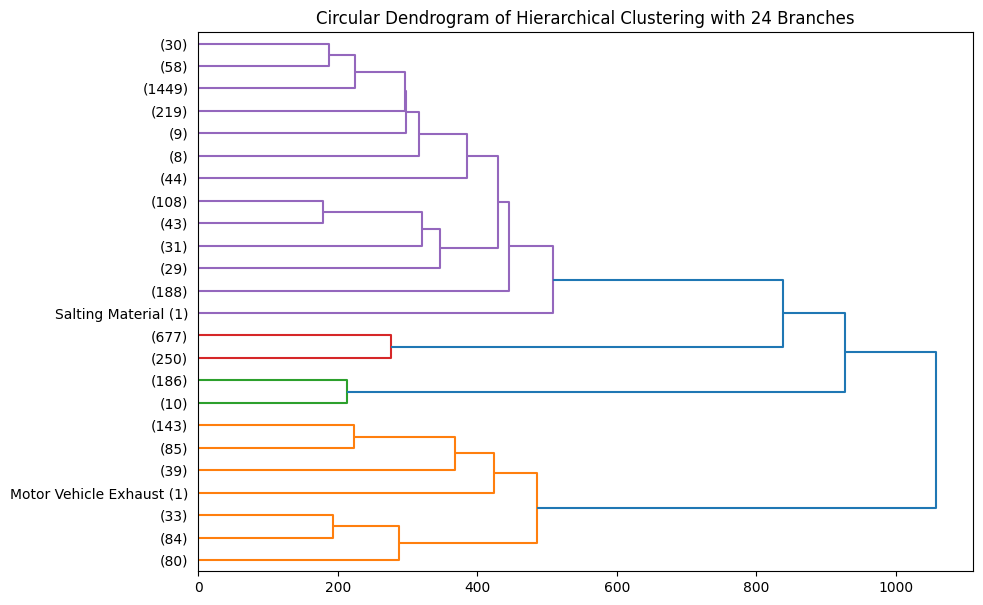

In [214]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from collections import Counter
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming 'target' is the category column, and 'name' is the label
# X = pivot_df.iloc[:, 2:47]

# Perform Agglomerative Clustering with more branches (e.g., 20 clusters)
max_clusters = 24
clustering = AgglomerativeClustering(n_clusters=max_clusters, linkage='ward')
pivot_df['cluster'] = clustering.fit_predict(X)

# Modify the get_majority_label function to return top k labels with their counts
def get_top_k_labels(cluster, names, k=3):
    counter = Counter(names).most_common(k)
    return [(label, count) for label, count in counter]

cluster_majority_labels = {}
k = 3  # Choose the number of majority names to show

for cluster in range(max_clusters):
    cluster_names = pivot_df[pivot_df['cluster'] == cluster]['name']
    top_k_labels = get_top_k_labels(cluster, cluster_names, k)
    
    # Combine top k labels into a string format 'Label1 (Count1), Label2 (Count2), ...'
    majority_label_str = ', '.join([f"{label} ({count})" for label, count in top_k_labels])
    
    cluster_majority_labels[cluster] = majority_label_str
    
    # Print cluster representative names and counts
    print(f"Cluster {cluster}: Representative Names = {majority_label_str}, Number of Items = {len(cluster_names)}")
    print("")

# Replace cluster numbers with majority names and their counts
pivot_df['cluster_label'] = pivot_df['cluster'].map(cluster_majority_labels)

# Generate the linkage matrix
Z = linkage(X, method='ward')

# Plot the circular dendrogram with updated labels
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='lastp', p= max_clusters, labels=pivot_df['cluster_label'].values, leaf_font_size=10, orientation='right')
plt.title(f'Circular Dendrogram of Hierarchical Clustering with {max_clusters} Branches')
plt.show()


## Data preprocessing

In [178]:
category_for_classification = 'speciated_cluster_name' 
#'assigned_profile', #'speciated_cluster_name'

In [179]:
# # Step 1: Read the CSV into a pandas dataframe

# filename = 'PM25-Speciated/IMPROVEDataset/usepa_final_with_assigned_profile.csv'
# df = pd.read_csv(filename)

In [180]:
# df

In [181]:
# Create a dictionary to map categories to numerical values
category_mapping = {category: index for index, category in enumerate(pivot_df[category_for_classification].unique())}

In [182]:
# Replace string categories with numerical values
pivot_df['final_profile'] = pivot_df[category_for_classification].map(category_mapping)

# The updated DataFrame and the mapping dictionary
print(category_mapping)
pivot_df

{'Paved Road Dust': 0, 'Hazardous Waste Incineration - Liquid Fuel Boiler': 1, 'Oil-Fired Power Plant': 2, 'Agriculture Soil': 3, 'Motor Vehicle Exhaust': 4, 'Cement Kiln': 5, 'Tire Burning': 6, 'Agriculture Vegetative Burning': 7, 'External Combustion - Wood-Fired Boiler Composite': 8, 'Hazardous Waste Incineration - Incinerator': 9, 'Secondary Lead Smelter - Blast Furnace': 10, 'Zinc Oxide Kiln': 11, 'Antimony Oxide Plant - Antimony Roasting': 12, 'Primary Lead Smelting - Speiss Fugitive Dust': 13, 'Kraft Recovery Furnace': 14, 'Ammonium Nitrate - Prill Tower': 15, 'Oil Refinery': 16, 'Brake Wear': 17, 'Primary Copper Smelter': 18, 'Light Duty Vehicle Exhaust - Gasoline': 19, 'Residential Wood Burning': 20, 'Incinerator': 21, 'Diesel Exhaust': 22, 'Cooking': 23, 'Salting Material': 24}


species,code,name,Aluminum,Ammonium,Antimony,Arsenic,Bromine,Cadmium,Calcium,Calcium ion,...,Sulfur,Tin,Vanadium,Zinc,Zirconium,speciated_cluster,speciated_cluster_name,cluster,cluster_label,final_profile
0,00000C,Overall Composite,4.079000,0.030000,0.806000,1.118000,0.0,0.285000,2.804000,0.0,...,2.457000,0.103000,0.059000,2.235000,0.004000,20,Paved Road Dust,8,"Motor Vehicle Exhaust (120), Hazardous Waste I...",0
1,10,Overall Composite,3.819000,0.023000,0.809000,1.410000,0.0,0.385000,2.399000,0.0,...,2.632000,0.114000,0.058000,2.218000,0.002000,20,Paved Road Dust,8,"Motor Vehicle Exhaust (120), Hazardous Waste I...",0
2,100CROC,Onroad Gasoline Cold Start,0.000000,0.430694,0.000000,0.000000,0.0,0.000000,0.387691,0.0,...,0.000000,0.000000,0.000000,0.078439,0.000000,3,Hazardous Waste Incineration - Liquid Fuel Boiler,8,"Motor Vehicle Exhaust (120), Hazardous Waste I...",1
3,101CROC,Onroad Gasoline Running,0.323953,2.778929,0.000000,0.000000,0.0,0.000000,1.443041,0.0,...,0.000000,0.000000,0.000000,0.592782,0.000000,3,Hazardous Waste Incineration - Liquid Fuel Boiler,8,"Motor Vehicle Exhaust (120), Hazardous Waste I...",1
4,102CROC,Onroad Diesel Non-DPF Idle,0.060154,1.739422,0.000000,0.000000,0.0,0.000000,0.584029,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,3,Hazardous Waste Incineration - Liquid Fuel Boiler,8,"Motor Vehicle Exhaust (120), Hazardous Waste I...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3800,95806,Peat Fire-Smoldering-Minnesota AE6,0.000376,0.107249,0.000000,0.000905,0.0,0.000000,0.000000,0.0,...,0.283134,0.000000,0.000266,0.000000,0.000063,3,Hazardous Waste Incineration - Liquid Fuel Boiler,8,"Motor Vehicle Exhaust (120), Hazardous Waste I...",1
3801,95807,Forest Fire Understory-Flaming-Minnesota AE6,0.000000,0.059422,0.034348,0.001050,0.0,0.031667,0.000000,0.0,...,0.211847,0.000000,0.005668,0.035434,0.000000,3,Hazardous Waste Incineration - Liquid Fuel Boiler,8,"Motor Vehicle Exhaust (120), Hazardous Waste I...",1
3802,95808,Forest Fire Understory-Smoldering-Minnesota AE6,0.000000,0.057489,0.004902,0.000693,0.0,0.003139,0.032457,0.0,...,0.281013,0.001126,0.000298,0.005076,0.000067,3,Hazardous Waste Incineration - Liquid Fuel Boiler,8,"Motor Vehicle Exhaust (120), Hazardous Waste I...",1
3803,95809,Grass Fire-Field-Kansas AE6,0.039424,0.159261,0.002697,0.001284,0.0,0.001939,0.790562,0.0,...,0.382831,0.004751,0.000134,0.040129,0.000624,3,Hazardous Waste Incineration - Liquid Fuel Boiler,8,"Motor Vehicle Exhaust (120), Hazardous Waste I...",1


In [183]:
len(category_mapping)

25

In [184]:
mapping_category = {value:key for key, value in category_mapping.items()}

In [185]:
# Step 2: Apply Non-negative matrix factorization on the data except last column
# Handle missing values by filling them with the mean of the column
# df.fillna(df.mean(), inplace=True)

In [186]:
# Separate features and target
X = pivot_df.iloc[:, 2:47].values
y = pivot_df['final_profile'].values

In [187]:
print(X.shape)
print(y.shape)

(3805, 45)
(3805,)


## NMF

In [188]:
# # Initialize NMF and fit to the data
# model = NMF(n_components=2, init='random', random_state=0)
# W = model.fit_transform(X)
# H = model.components_

# # Visualize the data
# plt.scatter(W[:, 0], W[:, 1], c=y)
# plt.xlabel('Component 1')
# plt.ylabel('Component 2')
# plt.title('NMF Components')
# plt.colorbar()
# plt.show()

## Graph Construction from NMF

## MLP

In [189]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import random
import numpy as np

In [190]:
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)  # if you are using multi-GPU.
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# Example usage
set_seed(42)

In [191]:
# Step 3: Use PyTorch MLP to classify the last column
# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [192]:
X_scaled = torch.FloatTensor(X_scaled)
y = torch.LongTensor(y)

In [193]:
# Assuming X and y are already defined as PyTorch tensors
# X = features tensor
# y = labels tensor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create datasets and dataloaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

In [194]:
print(X_train.shape)
print(X_test.shape)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

torch.Size([3044, 45])
torch.Size([761, 45])


In [195]:

# Define a simple MLP model for multi-class classification
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(X_train.shape[1], 256),
            nn.ReLU(),
            nn.Linear(256, len(category_mapping))  # Adjusted for 29 classes
        )
        
    def forward(self, x):
        return self.layers(x)

# Initialize the model
model = MLP()

In [196]:
model

MLP(
  (layers): Sequential(
    (0): Linear(in_features=45, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=25, bias=True)
  )
)

In [197]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Suitable for multi-class classification
optimizer = torch.optim.Adam(model.parameters())

In [198]:
def train():
    # Training loop
    for epoch in range(1000):  # number of epochs can be adjusted
        for batch_idx, (data, target) in enumerate(train_loader):
            # Forward pass
            output = model(data)
            loss = criterion(output, target)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        if epoch % 50 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item()}")

# train()

In [199]:
def test():
    model.eval()
    test_loss = 0
    all_targets = []
    all_predictions = []

    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += criterion(output, target).item()
            all_targets.extend(target.tolist())
            all_predictions.extend(output.argmax(dim=1).tolist())

    test_loss /= len(test_loader.dataset)
    print(f"Test Loss: {test_loss}")

    # Calculate F1 score
    f1 = f1_score(all_targets, all_predictions, average='weighted')
    print(f"F1 Score: {f1}")
    
    return all_predictions, all_targets
    
pred, target = test()

Test Loss: 0.051912161743123963
F1 Score: 0.0013336703026941342


In [200]:
for i, j in zip(pred, target):
    print("Pred:",mapping_category[i],"\n","True:",mapping_category[j])
    print()

Pred: Hazardous Waste Incineration - Incinerator 
 True: Agriculture Soil

Pred: Oil Refinery 
 True: Paved Road Dust

Pred: Oil Refinery 
 True: Hazardous Waste Incineration - Liquid Fuel Boiler

Pred: Motor Vehicle Exhaust 
 True: Paved Road Dust

Pred: Secondary Lead Smelter - Blast Furnace 
 True: Hazardous Waste Incineration - Liquid Fuel Boiler

Pred: External Combustion - Wood-Fired Boiler Composite 
 True: Cooking

Pred: Oil Refinery 
 True: Hazardous Waste Incineration - Liquid Fuel Boiler

Pred: External Combustion - Wood-Fired Boiler Composite 
 True: Paved Road Dust

Pred: Motor Vehicle Exhaust 
 True: Agriculture Vegetative Burning

Pred: Oil Refinery 
 True: Hazardous Waste Incineration - Liquid Fuel Boiler

Pred: Motor Vehicle Exhaust 
 True: Agriculture Vegetative Burning

Pred: Light Duty Vehicle Exhaust - Gasoline 
 True: Motor Vehicle Exhaust

Pred: Residential Wood Burning 
 True: Paved Road Dust

Pred: External Combustion - Wood-Fired Boiler Composite 
 True: Light